### Install necessary modules

In [1]:
!pip install openpyxl

In [2]:
import pandas as pd
from matplotlib import pyplot as plt

/var/folders/ns/4j0lfmtx38bdlwcnb7tqt8480000gn/T/ipykernel_80317/3079533157.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


### Data Load

In [3]:
import requests

def download_file(url, destination):
    try:
        # Send HTTP GET request to the URL
        response = requests.get(url, stream=True)
        response.raise_for_status()  # Raise an exception for HTTP errors

        # Save the content to the destination file
        with open(destination, 'wb') as file:
            for chunk in response.iter_content(chunk_size=8192):
                if chunk:
                    file.write(chunk)
        print(f"File successfully downloaded and saved to: {destination}")

    except requests.exceptions.RequestException as e:
        print(f"Error downloading the file: {e}")

# Example usage
file_url = "https://archive.ics.uci.edu/static/public/352/online+retail.zip"  # Replace with the actual URL
save_as = "Online_retail.zip"  # Replace with desired filename and extension

download_file(file_url, save_as)

File successfully downloaded and saved to: Online_retail.zip


In [4]:
import zipfile
import os

def unzip_file(zip_path, extract_to):
    try:
        with zipfile.ZipFile(zip_path, 'r') as zip_ref:
            zip_ref.extractall(extract_to)
        print(f"Files extracted successfully to {extract_to}")
    except zipfile.BadZipFile:
        print("Error: The file is not a valid ZIP file.")
    except FileNotFoundError:
        print("Error: The ZIP file was not found.")
    except Exception as e:
        print(f"An unexpected error occurred: {e}")

# Example usage
zip_file_path = "Online_retail.zip"  # Replace with your zip file path
destination_folder = "dataset"  # Replace with the folder where you want to extract files

# Create the folder if it doesn't exist
if not os.path.exists(destination_folder):
    os.makedirs(destination_folder)

unzip_file(zip_file_path, destination_folder)


Files extracted successfully to dataset


In [5]:
# !wget https://archive.ics.uci.edu/static/public/352/online+retail.zip

In [6]:
#!unzip online+retail.zip

In [7]:
import time
stime = time.time()

In [8]:
df1 = pd.read_excel("dataset/Online Retail.xlsx", dtype={'InvoiceNo': 'string', 'StockCode': 'string', 'Description': 'string', 'Country': 'string'})
df1.head(3)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom


In [9]:
df1.shape

(541909, 8)

In [10]:
df1[df1.InvoiceNo=="C536379"]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
141,C536379,D,Discount,-1,2010-12-01 09:41:00,27.5,14527.0,United Kingdom


In [11]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  string        
 1   StockCode    541909 non-null  string        
 2   Description  540455 non-null  string        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  string        
dtypes: datetime64[ns](1), float64(2), int64(1), string(4)
memory usage: 33.1 MB


### Data Cleaning: Handle Missing Values

In [12]:
df1.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [13]:
df1[df1['Description'].isnull()].head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
622,536414,22139,<NA>,56,2010-12-01 11:52:00,0.0,NaN,United Kingdom
1970,536545,21134,<NA>,1,2010-12-01 14:32:00,0.0,NaN,United Kingdom
1971,536546,22145,<NA>,1,2010-12-01 14:33:00,0.0,NaN,United Kingdom
1972,536547,37509,<NA>,1,2010-12-01 14:33:00,0.0,NaN,United Kingdom
1987,536549,85226A,<NA>,1,2010-12-01 14:34:00,0.0,NaN,United Kingdom


In [14]:
df1[df1.StockCode=="22139"]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
106,536381,22139,RETROSPOT TEA SET CERAMIC 11 PC,23,2010-12-01 09:41:00,4.25,15311.0,United Kingdom
622,536414,22139,<NA>,56,2010-12-01 11:52:00,0.00,NaN,United Kingdom
6392,536942,22139,amazon,15,2010-12-03 12:08:00,0.00,NaN,United Kingdom
6885,536982,22139,RETROSPOT TEA SET CERAMIC 11 PC,10,2010-12-03 14:27:00,11.02,NaN,United Kingdom
7203,537011,22139,<NA>,-5,2010-12-03 15:38:00,0.00,NaN,United Kingdom
...,...,...,...,...,...,...,...,...
538411,581405,22139,RETROSPOT TEA SET CERAMIC 11 PC,1,2011-12-08 13:50:00,4.95,13521.0,United Kingdom
539531,581439,22139,RETROSPOT TEA SET CERAMIC 11 PC,1,2011-12-08 16:30:00,10.79,NaN,United Kingdom
540441,581486,22139,RETROSPOT TEA SET CERAMIC 11 PC,6,2011-12-09 09:38:00,4.95,17001.0,United Kingdom
541387,581498,22139,RETROSPOT TEA SET CERAMIC 11 PC,2,2011-12-09 10:26:00,10.79,NaN,United Kingdom


In [15]:
df1[df1.StockCode=="22139"].Description.mode()

0    RETROSPOT TEA SET CERAMIC 11 PC 
Name: Description, dtype: string

In [16]:
most_freq = df1[["StockCode","Description"]].value_counts().reset_index()
most_freq

,StockCode,Description,count
0,85123A,WHITE HANGING HEART T-LIGHT HOLDER,2302
1,22423,REGENCY CAKESTAND 3 TIER,2200
2,85099B,JUMBO BAG RED RETROSPOT,2159
3,47566,PARTY BUNTING,1727
4,20725,LUNCH BAG RED RETROSPOT,1638
...,...,...,...
4787,35954,counted,1
4788,35954,check,1
4789,35923,check,1
4790,35915C,damaged,1


In [17]:
most_freq[most_freq.StockCode=="85123A"]

,StockCode,Description,count
0,85123A,WHITE HANGING HEART T-LIGHT HOLDER,2302
3310,85123A,CREAM HANGING HEART T-LIGHT HOLDER,9
4050,85123A,?,1
4081,85123A,wrongly marked carton 22804,1


In [18]:
most_freq = most_freq.groupby("StockCode").head(1)
most_freq.head(5)

,StockCode,Description,count
0,85123A,WHITE HANGING HEART T-LIGHT HOLDER,2302
1,22423,REGENCY CAKESTAND 3 TIER,2200
2,85099B,JUMBO BAG RED RETROSPOT,2159
3,47566,PARTY BUNTING,1727
4,20725,LUNCH BAG RED RETROSPOT,1638


In [19]:
most_freq[most_freq.StockCode=="85123A"]

,StockCode,Description,count
0,85123A,WHITE HANGING HEART T-LIGHT HOLDER,2302


In [20]:
most_freq.columns = ["StockCode", "freq_Description", "count"]
most_freq.head(3)

,StockCode,freq_Description,count
0,85123A,WHITE HANGING HEART T-LIGHT HOLDER,2302
1,22423,REGENCY CAKESTAND 3 TIER,2200
2,85099B,JUMBO BAG RED RETROSPOT,2159


In [21]:
df2 = df1.merge(most_freq, on="StockCode", how="left")
df2.head(3)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,freq_Description,count
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,WHITE HANGING HEART T-LIGHT HOLDER,2302.0
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,WHITE METAL LANTERN,328.0
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,CREAM CUPID HEARTS COAT HANGER,293.0


In [22]:
df2[df2['Description'].isnull()]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,freq_Description,count
622,536414,22139,<NA>,56,2010-12-01 11:52:00,0.0,NaN,United Kingdom,RETROSPOT TEA SET CERAMIC 11 PC,988.0
1970,536545,21134,<NA>,1,2010-12-01 14:32:00,0.0,NaN,United Kingdom,<NA>,NaN
1971,536546,22145,<NA>,1,2010-12-01 14:33:00,0.0,NaN,United Kingdom,CHRISTMAS CRAFT HEART STOCKING,1.0
1972,536547,37509,<NA>,1,2010-12-01 14:33:00,0.0,NaN,United Kingdom,NEW ENGLAND MUG W GIFT BOX,2.0
1987,536549,85226A,<NA>,1,2010-12-01 14:34:00,0.0,NaN,United Kingdom,<NA>,NaN
...,...,...,...,...,...,...,...,...,...,...
535322,581199,84581,<NA>,-2,2011-12-07 18:26:00,0.0,NaN,United Kingdom,DOG TOY WITH PINK CROCHET SKIRT,91.0
535326,581203,23406,<NA>,15,2011-12-07 18:31:00,0.0,NaN,United Kingdom,HOME SWEET HOME KEY HOLDER,114.0
535332,581209,21620,<NA>,6,2011-12-07 18:35:00,0.0,NaN,United Kingdom,SET OF 4 ROSE BOTANICAL CANDLES,172.0
536981,581234,72817,<NA>,27,2011-12-08 10:33:00,0.0,NaN,United Kingdom,SET OF 2 CHRISTMAS DECOUPAGE CANDLE,164.0


In [23]:
df2['Description'] = df2['Description'].mask(df2['Description'].isnull(), df2['freq_Description'])
df2.isnull().sum()

InvoiceNo                0
StockCode                0
Description            112
Quantity                 0
InvoiceDate              0
UnitPrice                0
CustomerID          135080
Country                  0
freq_Description       112
count                  112
dtype: int64

In [24]:
df2.dropna(subset=['Description'], inplace=True)
df2.isnull().sum()

InvoiceNo                0
StockCode                0
Description              0
Quantity                 0
InvoiceDate              0
UnitPrice                0
CustomerID          134968
Country                  0
freq_Description         0
count                    0
dtype: int64

In [25]:
df2.drop(columns = ["freq_Description", "count"], inplace=True)

After talking to a business manager, we confirmed that it is ok to have null values in CustomerID column

### Data Cleaning: Handle Invalid Values

In [26]:
df2.describe()

,Quantity,InvoiceDate,UnitPrice,CustomerID
count,541797.000000,541797,541797.000000,406829.000000
mean,9.555919,2011-07-04 14:06:48.671255296,4.612067,15287.690570
min,-80995.000000,2010-12-01 08:26:00,-11062.060000,12346.000000
25%,1.000000,2011-03-28 11:36:00,1.250000,13953.000000
50%,3.000000,2011-07-20 08:59:00,2.080000,15152.000000
75%,10.000000,2011-10-19 11:41:00,4.130000,16791.000000
max,80995.000000,2011-12-09 12:50:00,38970.000000,18287.000000
std,218.103428,NaN,96.769831,1713.600303


Quanity and UnitPrice contains negative values. We need to fix it

In [27]:
df2[df2.Quantity<=0].shape

(10527, 8)

In [28]:
df2[df2.UnitPrice<=0].shape

(2405, 8)

In [29]:
# Remove negative or zero quantities and prices
df3 = df2[(df2['Quantity'] > 0) & (df2['UnitPrice'] > 0)]
df3.describe()

,Quantity,InvoiceDate,UnitPrice,CustomerID
count,530104.000000,530104,530104.000000,397884.000000
mean,10.542037,2011-07-04 20:16:05.225087744,3.907625,15294.423453
min,1.000000,2010-12-01 08:26:00,0.001000,12346.000000
25%,1.000000,2011-03-28 12:22:00,1.250000,13969.000000
50%,3.000000,2011-07-20 12:58:00,2.080000,15159.000000
75%,10.000000,2011-10-19 12:39:00,4.130000,16795.000000
max,80995.000000,2011-12-09 12:50:00,13541.330000,18287.000000
std,155.524124,NaN,35.915681,1713.141560


We can notice HUGE values in both Quantity and UnitPrice. Let us use quantile to remove those big values (outliers)

In [30]:
df3.Quantity.quantile(0.9999)

1439.8763999990188

For now, we are not going to worry about extreme values because these can be legitimate values

### Feature Engineering: Create New Columns

In [31]:
df3.head(2)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [32]:
df4 = df3.copy()

df4['TotalSales'] = df4['Quantity'] * df4['UnitPrice']
df4.head(2)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalSales
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34


In [33]:
df4['Month'] = df4['InvoiceDate'].dt.month
df4.sample(2)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalSales,Month
493162,578155,21034,REX CASH+CARRY JUMBO SHOPPER,2,2011-11-23 11:32:00,0.95,12748.0,United Kingdom,1.9,11
129150,547377,82482,WOODEN PICTURE FRAME WHITE FINISH,6,2011-03-22 14:43:00,2.55,13050.0,United Kingdom,15.3,3


### Data Visualization and Insights

#### 1. Plot Monthly Total Sales Trend

In [34]:
monthly_sales = df4.groupby('Month')['TotalSales'].sum()
monthly_sales

Month
1      691364.560
2      523631.890
3      717639.360
4      537808.621
5      770536.020
6      761739.900
7      719221.191
8      759138.380
9     1058590.172
10    1154979.300
11    1509496.330
12    1462538.820
Name: TotalSales, dtype: float64

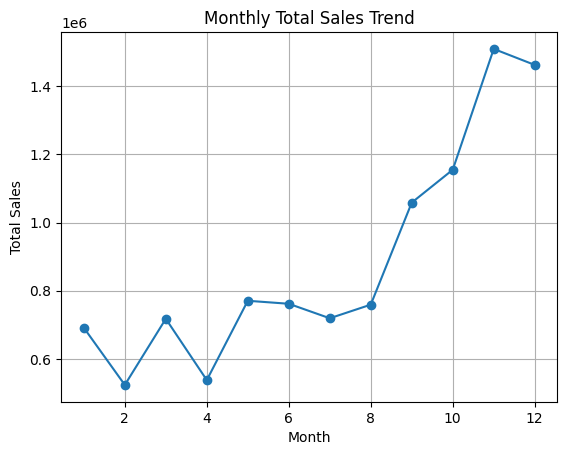

In [35]:
monthly_sales.plot(kind='line', title='Monthly Total Sales Trend', marker='o')
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.grid(True)
plt.show()

**Insights**

Total sales started rising up in August having a peek in November. This is likely due to the holiday season at the end of the year

#### 2. Top 5 countries based on total sales

In [36]:
df4.groupby('Country')['TotalSales'].sum().sort_values(ascending=False).head(5)

Country
United Kingdom    9025222.084
Netherlands        285446.340
EIRE               283453.960
Germany            228867.140
France             209715.110
Name: TotalSales, dtype: float64

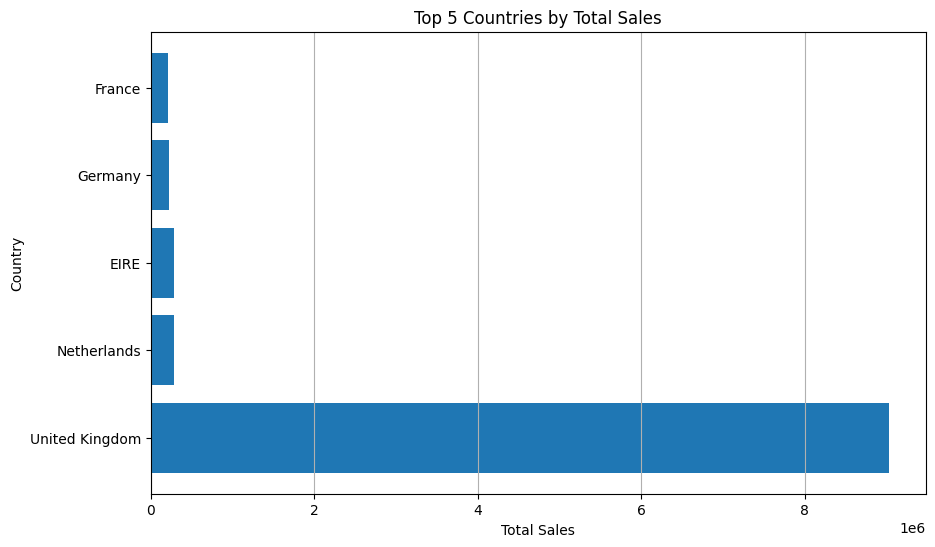

In [37]:
# prompt: plot horizontal bar chart for country wise monthly sales for top 5 countries

import matplotlib.pyplot as plt
top_5_countries = df4.groupby('Country')['TotalSales'].sum().sort_values(ascending=False).head(5)

plt.figure(figsize=(10, 6))
plt.barh(top_5_countries.index, top_5_countries.values)
plt.xlabel('Total Sales')
plt.ylabel('Country')
plt.title('Top 5 Countries by Total Sales')
plt.grid(axis='x')
plt.show()


**Insights**

1. UK has the highest sales (around 9 million)
1. Netherlands, EIRE, Germany and France are the next 4 countries each having a sales of more than 2 million

Since these countries cover the major sales revenues, we need to pay special attention to customers in these countries and make sure our product quality and service are the best. Also to break dependancy of sales from a single country we can focus on expanding sales in other countries as well

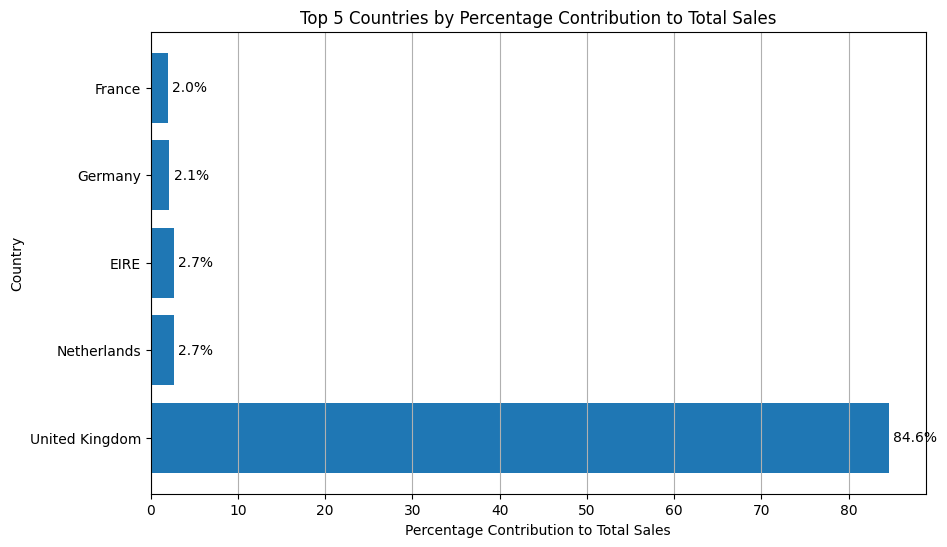

In [38]:
# prompt: Plot same chart as above but this time use percentage contribution. Show % on the bar

import pandas as pd
from matplotlib import pyplot as plt
import matplotlib.pyplot as plt


country_wise_sales = df4.groupby('Country')['TotalSales'].sum()
total_sales = country_wise_sales.sum()

top_5_countries = country_wise_sales.sort_values(ascending=False).head(5)
percentages = (top_5_countries / total_sales) * 100

plt.figure(figsize=(10, 6))
bars = plt.barh(top_5_countries.index, percentages)
plt.xlabel('Percentage Contribution to Total Sales')
plt.ylabel('Country')
plt.title('Top 5 Countries by Percentage Contribution to Total Sales')
plt.grid(axis='x')

# Add percentage labels to the bars
for bar, percentage in zip(bars, percentages):
    plt.text(bar.get_width() + 0.5, bar.get_y() + bar.get_height()/2, f'{percentage:.1f}%', va='center')

plt.show()


#### 3. Top 5 products based on total sales

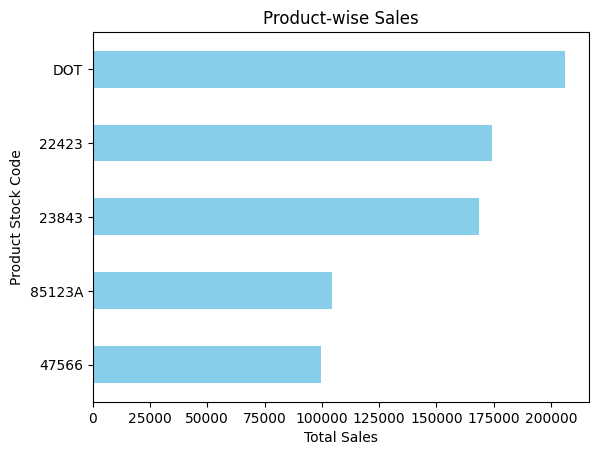

In [39]:
product_wise_sales = df4.groupby('StockCode')['TotalSales'].sum()

top_5_products = product_wise_sales.sort_values(ascending=False).head(5)
top_5_products.plot(kind='barh', color='skyblue')
plt.title('Product-wise Sales')
plt.xlabel('Total Sales')
plt.ylabel('Product Stock Code')
plt.gca().invert_yaxis()  # To show the highest sales at the top
plt.show()

In [40]:
product_wise_sales.sort_values(ascending=False)

StockCode
DOT       206248.770
22423     174484.740
23843     168469.600
85123A    104518.800
47566      99504.330
             ...    
90084          0.850
21268          0.840
51014c         0.830
84227          0.420
PADS           0.003
Name: TotalSales, Length: 3922, dtype: float64

In [41]:
product_wise_sales.sum()

10666684.544

In [42]:
df4[df4.StockCode=="DOT"].Description.iloc[0]

'DOTCOM POSTAGE'

In [43]:
for stock_code in top_5_products.index:
    description = df4[df4.StockCode==stock_code].Description.iloc[0]
    print(f"{stock_code} ==> {description}")

DOT ==> DOTCOM POSTAGE
22423 ==> REGENCY CAKESTAND 3 TIER
23843 ==> PAPER CRAFT , LITTLE BIRDIE
85123A ==> WHITE HANGING HEART T-LIGHT HOLDER
47566 ==> PARTY BUNTING


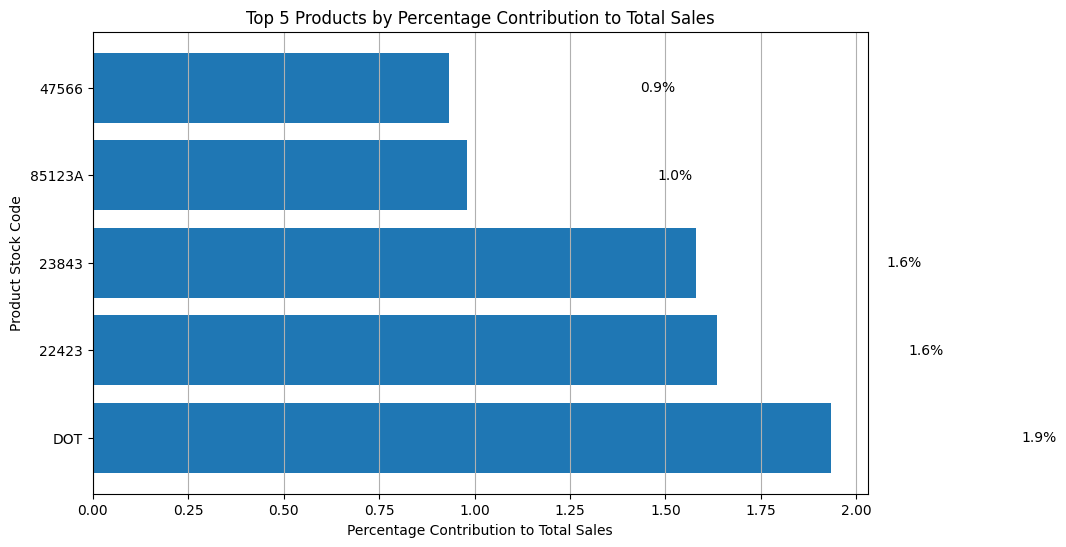

In [44]:
# prompt: Plot same chart as above for product sales but use percentage this time. Show % on the bar

# Assuming df4 is already created from the previous code
total_sales = product_wise_sales.sum()
percentages = (top_5_products / total_sales) * 100

plt.figure(figsize=(10, 6))
bars = plt.barh(top_5_products.index, percentages)
plt.xlabel('Percentage Contribution to Total Sales')
plt.ylabel('Product Stock Code')
plt.title('Top 5 Products by Percentage Contribution to Total Sales')
plt.grid(axis='x')

# Add percentage labels to the bars
for bar, percentage in zip(bars, percentages):
    plt.text(bar.get_width() + 0.5, bar.get_y() + bar.get_height()/2, f'{percentage:.1f}%', va='center')

plt.show()


#### 4. RFM Analysis (Recency, Frequency, Monetary)

In [45]:
df4['InvoiceDate'].max()

Timestamp('2011-12-09 12:50:00')

In [46]:
current_date = df4['InvoiceDate'].max() + pd.Timedelta(days=1)
rfm = df4.groupby('CustomerID').agg({
    'InvoiceDate': lambda x: (current_date - x.max()).days,
    'InvoiceNo': 'count',
    'TotalSales': 'sum'
})
rfm.columns = ['Recency', 'Frequency', 'Monetary']
rfm.head()

,Recency,Frequency,Monetary
CustomerID,,,
12346.0,326,1,77183.60
12347.0,2,182,4310.00
12348.0,75,31,1797.24
12349.0,19,73,1757.55
12350.0,310,17,334.40


In [47]:
rfm.describe()

,Recency,Frequency,Monetary
count,4338.000000,4338.000000,4338.000000
mean,92.536422,91.720609,2054.266460
std,100.014169,228.785094,8989.230441
min,1.000000,1.000000,3.750000
25%,18.000000,17.000000,307.415000
50%,51.000000,41.000000,674.485000
75%,142.000000,100.000000,1661.740000
max,374.000000,7847.000000,280206.020000


In [48]:
# Segment Customers based on RFM
rfm['R_Segment'] = pd.qcut(rfm['Recency'], 4, labels=[4, 3, 2, 1])
rfm['F_Segment'] = pd.qcut(rfm['Frequency'], 4, labels=[1, 2, 3, 4])
rfm['M_Segment'] = pd.qcut(rfm['Monetary'], 4, labels=[1, 2, 3, 4])
rfm['RFM_Score'] = rfm[['R_Segment', 'F_Segment', 'M_Segment']].sum(axis=1)

In [49]:
rfm.sample(5)

,Recency,Frequency,Monetary,R_Segment,F_Segment,M_Segment,RFM_Score
CustomerID,,,,,,,
13873.0,120,23,389.60,2,2,2,6
12398.0,46,85,1635.66,3,3,3,9
13397.0,73,38,1544.13,2,2,3,7
15466.0,85,57,334.53,2,3,2,7
15671.0,19,78,2657.13,3,3,4,10


In [50]:
# Customers with highest RFM Scores
rfm.sort_values('RFM_Score', ascending=False)

,Recency,Frequency,Monetary,R_Segment,F_Segment,M_Segment,RFM_Score
CustomerID,,,,,,,
18102.0,1,431,259657.30,4,4,4,12
14367.0,8,524,9261.52,4,4,4,12
17625.0,18,315,2047.00,4,4,4,12
15484.0,1,188,3594.31,4,4,4,12
14395.0,2,350,3507.71,4,4,4,12
...,...,...,...,...,...,...,...
13133.0,274,7,109.80,1,1,1,3
15578.0,162,13,127.10,1,1,1,3
13144.0,333,3,110.95,1,1,1,3


#### 5. Customer Churn Analysis

In [51]:
df4.head(2)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalSales,Month
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30,12
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,12


In [52]:
# Create a basket matrix for association rule mining
customer_last_purchase = df4.groupby("CustomerID")['InvoiceDate'].max()
customer_last_purchase.head(5)

CustomerID
12346.0   2011-01-18 10:01:00
12347.0   2011-12-07 15:52:00
12348.0   2011-09-25 13:13:00
12349.0   2011-11-21 09:51:00
12350.0   2011-02-02 16:01:00
Name: InvoiceDate, dtype: datetime64[ns]

In [53]:
type(customer_last_purchase)

pandas.core.series.Series

In [54]:
current_date

Timestamp('2011-12-10 12:50:00')

In [55]:
customer_last_purchase = (current_date - customer_last_purchase).dt.days
customer_last_purchase.head(5)

CustomerID
12346.0    326
12347.0      2
12348.0     75
12349.0     19
12350.0    310
Name: InvoiceDate, dtype: int64

In [56]:
# Define churn threshold (e.g., 90 days without purchase)
churn_threshold = 90
churned_customers = customer_last_purchase[customer_last_purchase > churn_threshold]
churned_customers.head(5)

CustomerID
12346.0    326
12350.0    310
12353.0    204
12354.0    232
12355.0    214
Name: InvoiceDate, dtype: int64

Number of Churned Customers: 1449


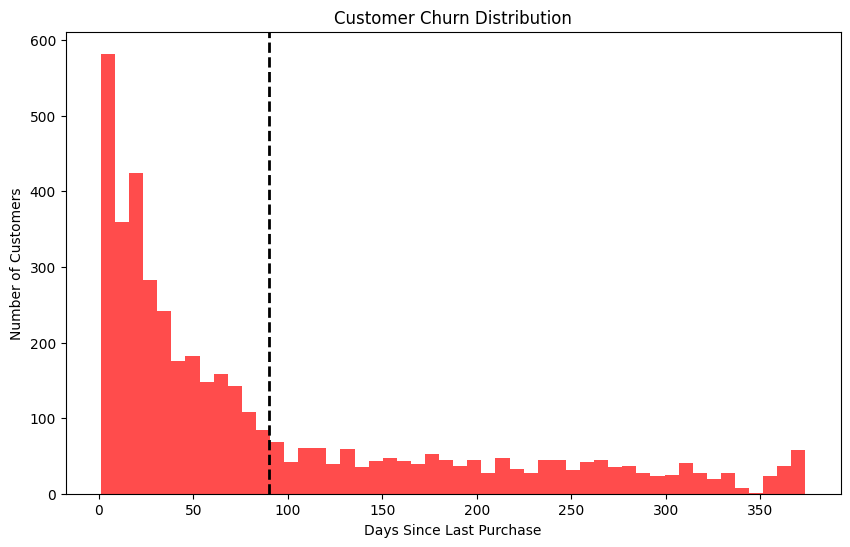

In [57]:
print("Number of Churned Customers:", len(churned_customers))
plt.figure(figsize=(10, 6))
plt.hist(customer_last_purchase, bins=50, color='red', alpha=0.7)
plt.axvline(churn_threshold, color='black', linestyle='dashed', linewidth=2)
plt.title('Customer Churn Distribution')
plt.xlabel('Days Since Last Purchase')
plt.ylabel('Number of Customers')
plt.show()

In [58]:
print(f"[{pd.__name__}] total time taken: {time.time() - stime} sec")

[pandas] total time taken: 24.915257930755615 sec
